In [2]:
import matplotlib.pyplot as plt
import numpy as np

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120) 
              ,(214, 39, 40), (255, 152, 150),(44, 160, 44), (152, 223, 138)
              , (140, 86, 75), (196, 156, 148), (148, 103, 189), (197, 176, 213)
            , (23, 190, 207), (158, 218, 229) #light blue
             ,(227, 119, 194), (247, 182, 210)  #light green
             , (188, 189, 34), (219, 219, 141)  #pink
             ,(127, 127, 127), (199, 199, 199) #grey
              
            ]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

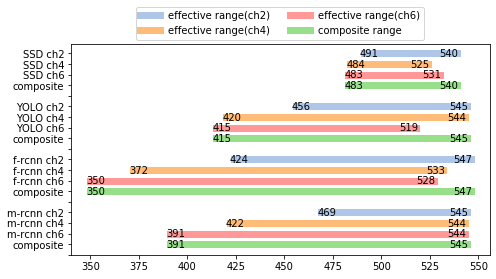

In [3]:
#old 
#effective_range = [[(490, 544), (491, 531), (481, 530)],  # SSD
#                       [(456, 545), (420, 544), (415, 519)],  # yolo
#                       [(466, 544), (420, 531), (373, 524)],  # faster rcnn
#                       [(469, 545), (422, 544), (391, 544)]]  # mask-rcnn
effective_range = [[(491, 540), (484, 525), (483, 531)],  # SSD
                       [(456, 545), (420, 544), (415, 519)],  # yolo
                       [(424, 547), (372, 533), (350, 528)],  # faster rcnn
                       [(469, 545), (422, 544), (391, 544)]]  # mask-rcnn

plt.figure(figsize=(7,4))
#plt.figure(figsize=(10, 4))

max_y=19
merge_range = []
for idx,eff in enumerate(effective_range):
    
    res1 = list(map(max, zip(*eff))) 
    res2 = list(map(min, zip(*eff))) 
    merge_range.append( (res2[0],res1[1]))
    merge_min = res2[0]
    merge_max = res1[1]
    
    for i,myrange in enumerate(eff):
        x=range(myrange[0],myrange[1])
        y=[max_y-(idx*5+i)]*(myrange[1]-myrange[0])
        plt.plot(x,y,color=tableau20[i*2+1],linewidth=7.0)
        plt.text(myrange[0]-2, max_y-(idx*5+i)-0.3, myrange[0], fontsize=10)
        plt.text(myrange[1]-10, max_y-(idx*5+i)-0.3, myrange[1], fontsize=10)
        
    x=range(merge_min,merge_max)
    y=[max_y-(idx*5+3)]*(merge_max-merge_min)
    plt.plot(x,y,color=tableau20[6+1],linewidth=7.0)
    
    plt.text(merge_min-2, max_y-(idx*5+3)-0.3, merge_min, fontsize=10)
    plt.text(merge_max-10, max_y-(idx*5+3)-0.3, merge_max, fontsize=10)
    
ytick_show = ['','composite','m-rcnn ch6','m-rcnn ch4','m-rcnn ch2','',
             'composite','f-rcnn ch6','f-rcnn ch4','f-rcnn ch2','',
             'composite','YOLO ch6','YOLO ch4','YOLO ch2','',
            'composite','SSD ch6','SSD ch4','SSD ch2']

#ytick_show.reverse()
legend_x = 0.5 #1
legend_y = 1.2 #0.5

plt.legend(["effective range(ch2)", "effective range(ch4)","effective range(ch6)","composite range"],ncol=2,loc='upper center', bbox_to_anchor=(legend_x, legend_y))
#,loc='center left', bbox_to_anchor=(legend_x, legend_y), numpoints=1)

plt.yticks(range(20), ytick_show)
plt.tight_layout()
plt.savefig('effective_range.png')

In [6]:
import cv2

face_img = cv2.imread('C:/Users/superorange/Videos/MI3_dataset/Pathway2_3/ORIG/ch2/00524.png')
crop_img = face_img[214:264, 560:600]
cv2.imwrite('output.png',crop_img)

True